In [7]:
import pandas as pd
import gpxo
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import warnings
import datetime
import gpxpy
import gpx

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore')

In [8]:
# Caminho da pasta que terá iteração nos seus arquivos
folder_path = 'C:/Users/USER/Desktop/EstudosDados/Projetos/Corrida/physical_inactivity_prediction/athletes_activities/athlete1' 

In [9]:
# Exemplo de atividade aleatória do atleta
act_name = random.choice(os.listdir(folder_path))

path_example = os.path.join(folder_path, act_name)

### Conferindo se algum arquivo está com problema de leitura

In [10]:
'''
# Caminho da pasta que terá iteração nos seus arquivos
folder_path = 'C:/Users/USER/Desktop/EstudosDados/Projetos/Corrida/physical_inactivity_prediction/athletes_activities/athlete1'

# Contador de linhas para servir de index
count = 0

# Itera por cada arquivo na pasta
for filename in os.listdir(folder_path):
    # Junta o nome do arquivo com o caminho da pasta
    full_path = os.path.join(folder_path, filename)    

    try:

        # Lê o arquivo no formato específico com a biblioteca gpxo
        gpx = gpxo.Track(full_path)

    except:

        # Printa o index e o nome do arquivo que ocorreu algum erro na leitura
        print(count, f"An error ocurred on {filename}")
    
    # Acréscimo no contador para reiniciar o loop
    count +=1

# Arquivo 6500685512.gpx com problema.
# UnicodeDecodeError: 'charmap' codec can't decode byte 0x90 in position 366: character maps to <undefined>.
# Problema resolvido: A atividade tinha um emoji e o decoder não estava conseguindo lê-lo. Se ocorrer o erro novamente, tentar remover o emoji do arquivo gpx.
'''

'\n# Caminho da pasta que terá iteração nos seus arquivos\nfolder_path = \'C:/Users/USER/Desktop/EstudosDados/Projetos/Corrida/physical_inactivity_prediction/athletes_activities/athlete1\'\n\n# Contador de linhas para servir de index\ncount = 0\n\n# Itera por cada arquivo na pasta\nfor filename in os.listdir(folder_path):\n    # Junta o nome do arquivo com o caminho da pasta\n    full_path = os.path.join(folder_path, filename)    \n\n    try:\n\n        # Lê o arquivo no formato específico com a biblioteca gpxo\n        gpx = gpxo.Track(full_path)\n\n    except:\n\n        # Printa o index e o nome do arquivo que ocorreu algum erro na leitura\n        print(count, f"An error ocurred on {filename}")\n    \n    # Acréscimo no contador para reiniciar o loop\n    count +=1\n\n# Arquivo 6500685512.gpx com problema.\n# UnicodeDecodeError: \'charmap\' codec can\'t decode byte 0x90 in position 366: character maps to <undefined>.\n# Problema resolvido: A atividade tinha um emoji e o decoder não

#### Demonstração dos valores após leitura dos arquivos com diferentes bibliotecas

In [11]:
#gpxo.Track
gpxo_example = gpxo.Track(path_example).data.reset_index()

gpxo_example

,time,latitude (°),longitude (°),distance (km),compass (°),duration (s),velocity (km/h),elevation (m)
0,2020-10-26 15:17:10,-22.943477,-43.180130,0.000000,0.000000,0.0,0.7956,8.6
1,2020-10-26 15:17:11,-22.943475,-43.180130,0.000221,349.247193,1.0,1.8990,8.6
2,2020-10-26 15:17:12,-22.943468,-43.180133,0.001055,355.014693,2.0,3.3336,8.6
3,2020-10-26 15:17:13,-22.943459,-43.180131,0.002073,20.241670,3.0,5.2524,8.6
4,2020-10-26 15:17:14,-22.943444,-43.180122,0.003973,29.773800,4.0,6.6672,8.6
...,...,...,...,...,...,...,...,...
1584,2020-10-26 15:43:35,-22.926805,-43.170872,4.174780,212.568601,1585.0,6.2226,7.9
1585,2020-10-26 15:43:36,-22.926812,-43.170879,4.175837,220.466301,1586.0,3.6846,7.9
1586,2020-10-26 15:43:37,-22.926819,-43.170885,4.176827,222.150770,1587.0,4.0860,7.9
1587,2020-10-26 15:43:38,-22.926827,-43.170894,4.178107,234.868330,1588.0,4.5666,7.9


In [33]:
#gpxpy
gpx = open(path_example, 'r')

gpxpy_example = gpxpy.parse(gpx)
gpxpy_example

gpxpy_example.extensions.tag[0]

AttributeError: 'list' object has no attribute 'tag'

### Criando as features com os dados de cada arquivo

In [ ]:
# Dicionário com as features que serão criadas com o valor de cada atividade
df_athlete_dict = {
    'activity_date': [],
    'total_distance (km)': [], 
    'total_time (min)': [],
    'pace (min/km)': [],
    'velocity (km/h)': []    
}

# Itera por cada arquivo na pasta
for filename in os.listdir(folder_path):
    # Junta o nome do arquivo com o caminho da pasta
    full_path = os.path.join(folder_path, filename)

    # Lendo o arquivo gpx com a biblioteca gpxo para gerar um Dataframe com os dados da atividade
    gpx = gpxo.Track(full_path).data.reset_index()    

    ''' Cocantenação dos elementos novos no df a cada iteração '''
        
    # Data da atividade (a partir da primeira linha do df original com os pontos marcados)
    df_athlete_dict['activity_date'].append(gpx['time'][0].round('d'))

    # Distância total em km
    total_dist = gpx['distance (km)'].max()
    df_athlete_dict['total_distance (km)'].append(round(total_dist,2))

    # Tempo total em minutos
    total_min = (gpx['time'].max() - gpx['time'].min()).total_seconds() // 60
    df_athlete_dict['total_time (min)'].append(total_min)

    # Ritmo geral da atividade
    df_athlete_dict['pace (min/km)'].append(round(total_min / total_dist, 2))

    # Velocidade em km/h
    df_athlete_dict['velocity (km/h)'].append(round(total_dist / (total_min / 60),2))

In [ ]:
# Passando o dicionário com as features criadas para um Dataframe
df_athlete_activities = pd.DataFrame(df_athlete_dict)

In [ ]:
# Removendo datas duplicadas relacionadas à 2 ou mais atividades no mesmo dia
df_athlete_activities.drop_duplicates(subset='activity_date', inplace= True)

In [ ]:
# Atribuindo tipo de atividade para 'Atividade'
df_athlete_activities.insert(2, 'activity_type', 'Atividade')

In [ ]:
# Ordenando a data da menor pra maior e resetando index
df_athlete_activities.sort_values('activity_date', ascending=True, inplace=True)
df_athlete_activities.reset_index(drop=True, inplace= True)

### Criando feature de contador de dias entre atividades

In [ ]:
# Fazendo a diferença entre a atividade seguinte e a anterior e preenchendo a primeira linha com 0
df_athlete_activities['days_between_activities'] = df_athlete_activities['activity_date'].diff(periods=1).fillna(datetime.timedelta(days=1))

# Alterando o tipo da coluna para int
df_athlete_activities['days_between_activities'] = (df_athlete_activities['days_between_activities'].dt.days) - 1

### Abrindo os dados para cada dia

In [ ]:
# Data da primeira atividade
start = df_athlete_activities['activity_date'].iloc[0]

# Data da última atividade
end = df_athlete_activities['activity_date'].iloc[-1]

# Dias entre a primeira e última atividade
dates = pd.date_range(start,end,freq='d')

# Colocando todas as datas em um df
df_dates = pd.DataFrame({'activity_date': dates})
df_dates

,activity_date
0,2021-02-11
1,2021-02-12
2,2021-02-13
3,2021-02-14
4,2021-02-15
...,...
1158,2024-04-14
1159,2024-04-15
1160,2024-04-16
1161,2024-04-17


In [ ]:
# Right join pra poder manter os dados das atividades existentes mas adicionar linhas para os novos dias
df_athlete_activities = df_dates.merge(df_athlete_activities, on='activity_date', how='left')

# Preechendo os valores nulos como Dia sem atividade
df_athlete_activities['activity_type'].fillna('Dia sem atividade', inplace=True)

In [ ]:
df_athlete_activities['activity_type'].value_counts()

activity_type
Dia sem atividade    1101
Atividade              62
Name: count, dtype: int64

In [ ]:
# Preenchendo os valores NaN com 1 para poder fazer uma subtração cumulativa
df_athlete_activities['days_between_activities'].fillna(-1, inplace= True)

# Fazendo cumsum com valores negativos e depois multiplicando por -1 pra transformá-los em positivos
df_athlete_activities['days_between_activities'] = df_athlete_activities['days_between_activities'].cumsum() * -1

# Transformando em int pra evitar -0 ao invés de 0
df_athlete_activities['days_between_activities'] = df_athlete_activities['days_between_activities'].astype(int)

In [ ]:
df_athlete_activities

,activity_date,total_distance (km),activity_type,total_time (min),pace (min/km),velocity (km/h),days_between_activities
0,2021-02-11,5.73,Atividade,49.0,8.56,7.01,0
1,2021-02-12,NaN,Dia sem atividade,NaN,NaN,NaN,1
2,2021-02-13,NaN,Dia sem atividade,NaN,NaN,NaN,2
3,2021-02-14,NaN,Dia sem atividade,NaN,NaN,NaN,3
4,2021-02-15,NaN,Dia sem atividade,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...
1158,2024-04-14,NaN,Dia sem atividade,NaN,NaN,NaN,8
1159,2024-04-15,NaN,Dia sem atividade,NaN,NaN,NaN,9
1160,2024-04-16,NaN,Dia sem atividade,NaN,NaN,NaN,10
1161,2024-04-17,NaN,Dia sem atividade,NaN,NaN,NaN,11


In [ ]:
df_athlete_activities['days_between_activities'].describe()

count    1163.000000
mean      107.960447
std       113.904133
min         0.000000
25%         6.000000
50%        58.000000
75%       203.500000
max       367.000000
Name: days_between_activities, dtype: float64

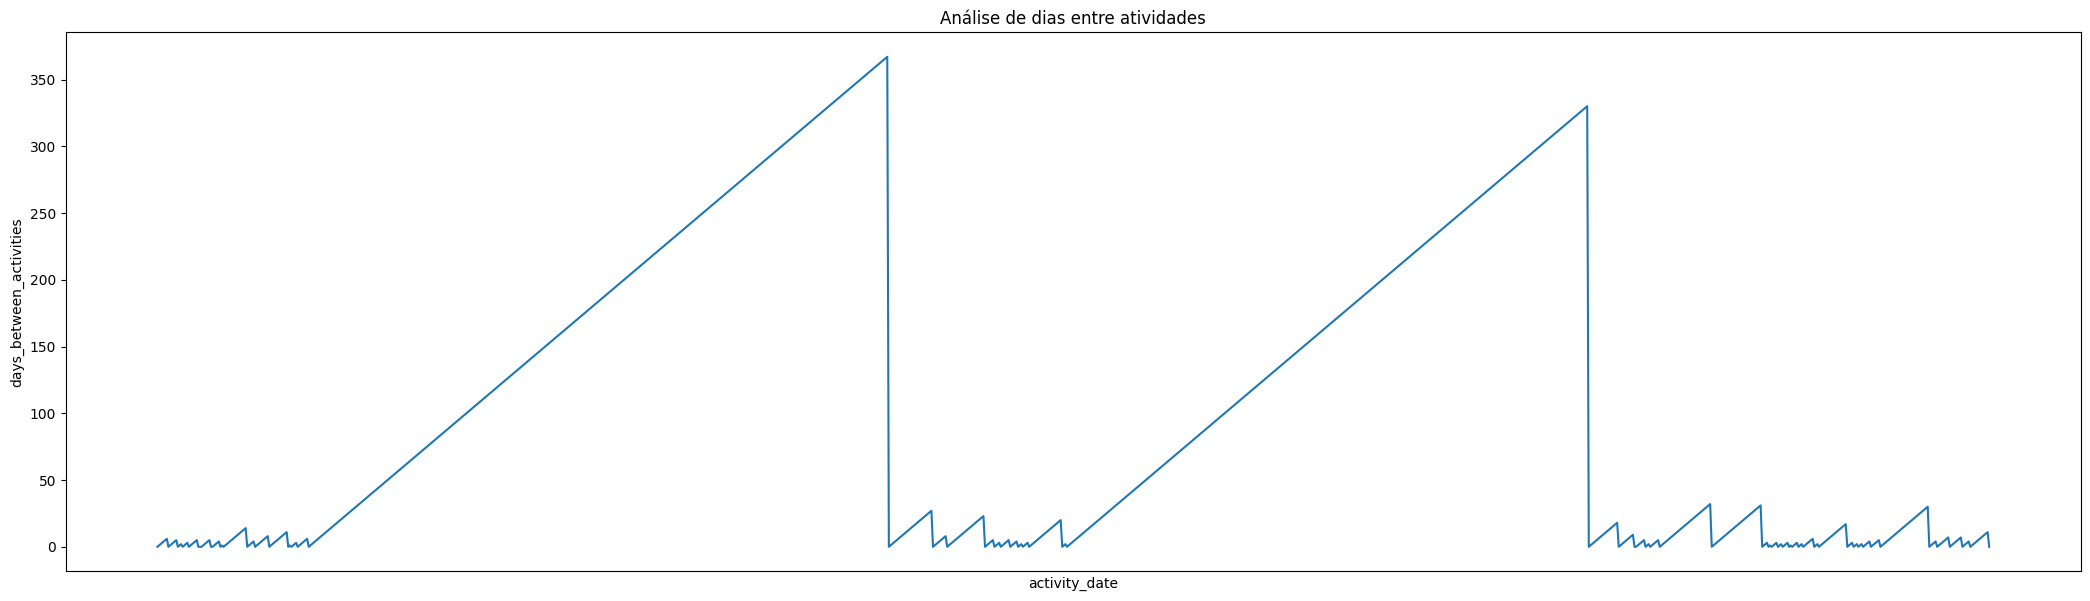

In [ ]:
fig, ax = plt.subplots(figsize =(26, 7))
sns.lineplot(x = 'activity_date', y= 'days_between_activities', data= df_athlete_activities)
plt.xticks([])
plt.title('Análise de dias entre atividades')
plt.show()

In [ ]:
#df_athlete_activities.to_csv('C:/Users/USER/Desktop/EstudosDados/Projetos/Corrida/physical_inactivity_prediction/scripts/tests_and_preprocessing/gpx_processed_data.csv', index=False)